<a href="https://colab.research.google.com/github/FatihKarabas/AI-WORKS/blob/main/BAQI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hava Kalitesi İndeksi**

Türkiye Ulusal Hava Kalitesi İndeksi’ni oluştururken, US-EPA Hava Kalitesi İndeksi’ni ulusal mevzuat ve sınır değerleriyle uyumlu hale getirmiştir.

İndeksi belirleyen hava kirletici maddeler,

1.   partikül madde  (PM10), (24 saatlik ortalama)
2.   karbon monoksit   (CO),  (8 saatlik ortalama)(Bandırma verileri bulunamadı)
3.   azot dioksit (NO2), (1 saatlik ortalama)
4.   kükürt dioksit (SO2) (1 saatlik ortalama)
5.   ozon (O3)(8 saatlik ortalama)
Burada dikkat çekici nokta ise, PM2.5 için sınır değerinin henüz bulunmamasıdır.

 Söz parametreler
www.havaizleme.gov.tr adresinden anlık olarak takip edilebilmektedir

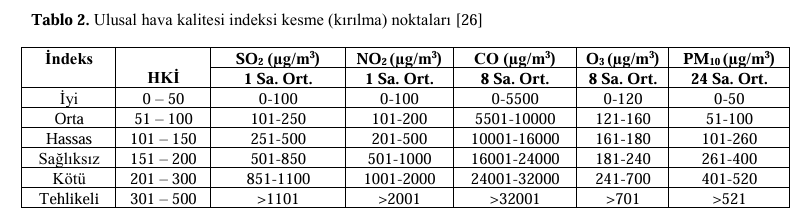

HKİ Hesaplama Yöntemi

   Hava kalitesi indeksi (HKİ), hava kirliliğine bağlı sağlık riski düzeyini ifade etmek için kullanılan bir terim
olup, hava kalitesini basit ve anlaşılabilir bir şekilde açıklamaktadır.

 HKİ değeri, bir bölgedeki her bir kirletici için ayrı ayrı hesaplanır ve her bir kirletici için hesaplanan en yüksek HKİ, o güne ait HKİ değerini oluşturmaktadır  
   EPA’nın önerdiği HKİ  0-500 arasında değişebilen bir ölçeğe sahiptir. Buradaki amaç; kirlilik
konsantrasyonunu 0 ile 500 arasında bir sayıya dönüştürmektir. 0, 50, 100, 150,… 500 arasındaki HKİ değerleri
“kesme noktaları” olarak adlandırılır . Her bir HKİ kırılma noktası, tanımlanmış bir kirlilik
konsantrasyonuna karşılık gelir. HKİ aşağıdaki formülle hesaplanabilmektedir

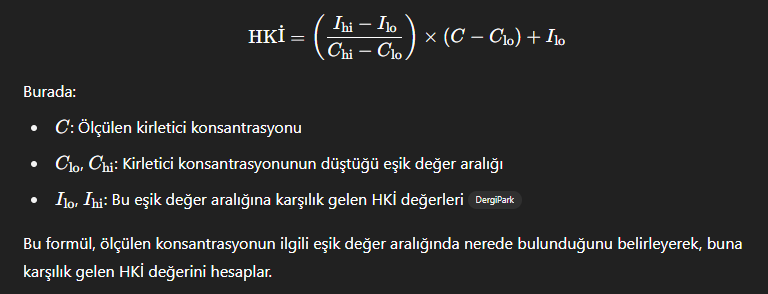

[T.C. Çevre, Şehircilik ve İklim Değişikliği Bakanlığı. (2022). Hava Kalitesi İzleme Sistemi.](https://sim.csb.gov.tr/Home/HKI?baslik=HAVZA%20%C4%B0ZLEME%20S%C4%B0STEM%C4%B0)



Meteorolojik Değişkenler:

temp (sıcaklık), dwpt (çiy noktası), rhum (bağıl nem), prcp (yağış), wdir (rüzgar yönü), wspd (rüzgar hızı), pres (basınç)

(kaynak : Meteostat Developers https://dev.meteostat.net/python/hourly.html#example)

https://meteostat.net/en/station/17115?t=2021-01-01/2021-01-31#google_vignette


40.3167, 27.9667

In [25]:
met_cols = ['temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']
pol_cols = ['pm10', 'so2', 'no2', 'o3']
out_cols = ['pm10', 'so2', 'no2', 'o3',"prcp","pres","rhum","dwpt","temp","wspd"]
gunler = ['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']
aylar = ['Oca', 'Şub', 'Mar', 'Nis', 'May', 'Haz', 'Tem', 'Ağu', 'Eyl', 'Eki', 'Kas', 'Ara']

# **EDA**

In [14]:
from google.colab import drive

# Google Drive'ı bağla
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Dosyanın tam yolu
file_path = '/content/drive/MyDrive/BanAQI.csv'
import pandas as pd
# Veri dosyasını oku
df = pd.read_csv(file_path)

In [19]:
df.head()  # Varsayılan olarak ilk 5 satırı gösterir

,year,month,day,hour,pm10,so2,no2,o3,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2021,1,1,0,20.08,6.94,10.22,55.56,11.9,9.5,85.0,0.0,180.0,18.4,1014.5
1,2021,1,1,1,18.07,8.22,12.64,51.94,11.0,9.1,88.0,NaN,260.0,14.8,1014.0
2,2021,1,1,2,26.32,5.63,7.98,66.38,11.0,10.1,94.0,NaN,150.0,7.6,1014.0
3,2021,1,1,3,25.14,2.48,4.65,69.10,10.1,9.2,94.0,NaN,170.0,9.4,1014.6
4,2021,1,1,4,24.23,2.08,3.49,67.40,11.0,10.1,94.0,NaN,220.0,7.6,1015.0


In [20]:
df.sample(10)  # Rastgele belirlenen sayıda satırı gösterir

,year,month,day,hour,pm10,so2,no2,o3,temp,dwpt,rhum,prcp,wdir,wspd,pres
745,2021,2,1,1,28.18,9.02,25.62,44.44,13.0,3.9,54.0,0.0,170.0,20.5,1007.0
24958,2023,11,6,22,71.39,7.10,86.21,NaN,14.0,13.0,94.0,0.0,160.0,1.8,1019.0
14480,2022,8,27,8,34.33,6.98,42.45,10.39,27.0,20.1,66.0,0.0,170.0,9.4,1010.6
23165,2023,8,24,5,37.88,11.20,22.92,NaN,25.0,22.1,84.0,0.0,50.0,25.9,1013.0
33951,2024,11,15,15,16.48,16.61,13.19,31.80,12.1,10.8,92.0,0.0,20.0,31.3,1016.9
11383,2022,4,20,7,45.81,6.58,38.89,8.40,9.0,7.0,87.0,0.0,170.0,3.6,1018.0
3591,2021,5,30,15,NaN,NaN,NaN,NaN,22.1,14.5,62.0,0.0,10.0,18.4,1012.9
12484,2022,6,5,4,34.11,4.69,11.27,75.69,20.0,20.0,100.0,0.0,30.0,18.4,1015.0
24343,2023,10,12,7,17.90,20.13,20.75,NaN,20.0,13.0,64.0,0.0,70.0,20.5,1022.8
15070,2022,9,20,22,27.18,8.54,38.34,34.70,17.0,12.9,77.0,0.0,90.0,7.6,1015.0


In [21]:
df.info()  # Veri tipi ve eksik değerleri gösterir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    35064 non-null  int64  
 1   month   35064 non-null  int64  
 2   day     35064 non-null  int64  
 3   hour    35064 non-null  int64  
 4   pm10    32366 non-null  float64
 5   so2     33940 non-null  float64
 6   no2     33945 non-null  float64
 7   o3      22884 non-null  float64
 8   temp    35064 non-null  float64
 9   dwpt    35064 non-null  float64
 10  rhum    35064 non-null  float64
 11  prcp    34778 non-null  float64
 12  wdir    35035 non-null  float64
 13  wspd    35064 non-null  float64
 14  pres    34902 non-null  float64
dtypes: float64(11), int64(4)
memory usage: 4.0 MB


In [27]:
df.shape  # (satır sayısı, sütun sayısı)

(35064, 15)

In [26]:
df.nunique()

,0
year,4
month,12
day,31
hour,24
pm10,8934
so2,3184
no2,7854
o3,9691
temp,404
dwpt,345


In [23]:
# Eksik veri sayısı ve oranı
eksik = df.isnull().sum()
oran = 100 * df.isnull().mean()

# Sadece eksik değeri olanları yazdır
print(pd.DataFrame({'Eksik veri Sayısı': eksik, 'Oran (%)': oran.map(lambda x: f'{x:.3f}')})[eksik > 0])

      Eksik veri Sayısı Oran (%)
pm10               2698    7.695
so2                1124    3.206
no2                1119    3.191
o3                12180   34.736
prcp                286    0.816
wdir                 29    0.083
pres                162    0.462


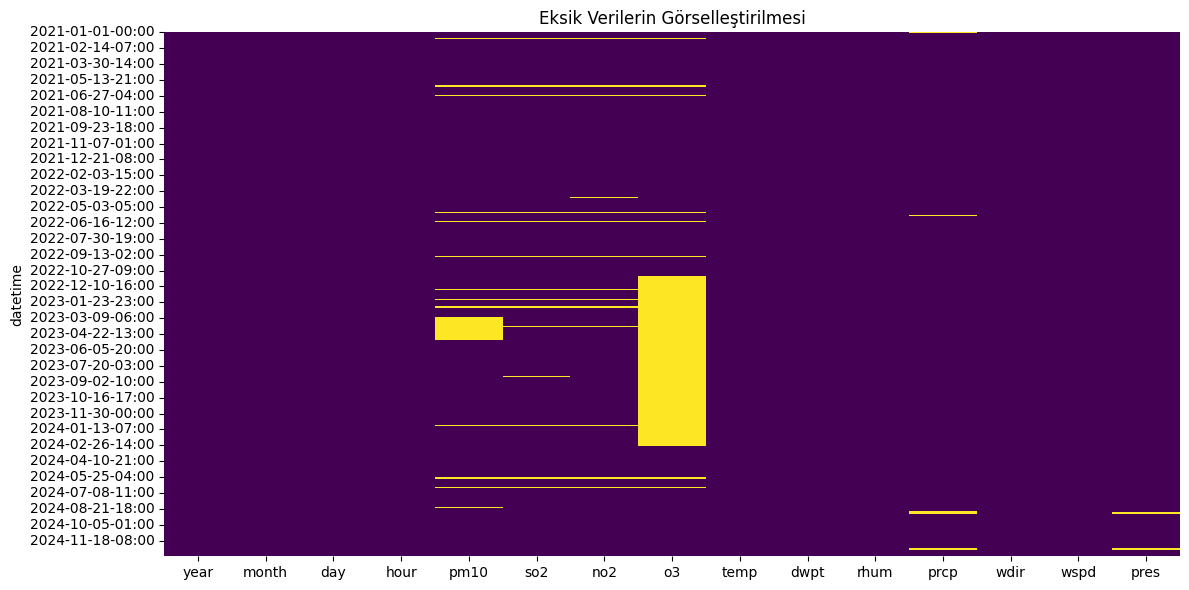

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Zaman sütunu oluşturalım ve formatı belirle
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']]).dt.strftime('%Y-%m-%d-%H:%M')
df.set_index('datetime', inplace=True)

# Eksik veri görselleştirmesi
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Eksik Verilerin Görselleştirilmesi")
plt.tight_layout()
plt.show()

İSTATİSTİK İCELEME

In [24]:
# Tüm sütunların gösterilmesi ve ekran genişliğinin arttırılması
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)  # DataFrame'in çok satıra bölünmesini engeller
pd.set_option('display.width', None)           # Genişliği sınırlama

print(df.describe(exclude=['datetime64[ns]', 'int64']).T)  # Datetime satırlarını çıkardım.

        count         mean         std     min      25%      50%      75%      max
pm10  32366.0    43.264454   25.314861    0.31    26.27    37.62    53.81   320.89
so2   33940.0     8.258972    7.441090    0.00     3.83     6.23    10.46   209.86
no2   33945.0    31.745957   20.415370    0.38    16.96    27.27    41.70   178.03
o3    22884.0    54.206199   30.292367    1.28    31.28    53.39    75.26   192.34
temp  35064.0    15.521986    8.121103   -8.30     9.20    15.00    22.00    43.00
dwpt  35064.0    10.790038    6.541019   -9.50     6.20    11.00    16.00    27.00
rhum  35064.0    75.925650   16.789278   13.00    64.00    78.00    89.00   100.00
prcp  34778.0     0.073679    0.383725    0.00     0.00     0.00     0.00    11.70
wdir  35035.0   118.630427  115.663545    0.00    30.00    51.00   200.00   360.00
wspd  35064.0    16.274809   11.481866    0.00     5.40    14.80    24.10    74.20
pres  34902.0  1015.906143    6.416063  980.00  1011.60  1015.00  1020.00  1038.20


KORELASYON MATRİSİ

In [30]:
# Select columns excluding specified data types
selected_columns = df.select_dtypes(exclude=['datetime64[ns]', 'int64'])

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

          pm10       so2       no2        o3      temp      dwpt      rhum      prcp      wdir      wspd      pres
pm10  1.000000  0.234495  0.454307 -0.260449 -0.019347 -0.052124 -0.022720 -0.070235  0.134539 -0.311256 -0.034124
so2   0.234495  1.000000  0.163131 -0.165390 -0.098392 -0.181180 -0.096394  0.040841  0.161230 -0.136863 -0.062270
no2   0.454307  0.163131  1.000000 -0.433466 -0.254291 -0.194590  0.216809 -0.045384  0.059324 -0.385202  0.091809
o3   -0.260449 -0.165390 -0.433466  1.000000  0.533849  0.423762 -0.386481 -0.025286 -0.108575  0.352742 -0.225656
temp -0.019347 -0.098392 -0.254291  0.533849  1.000000  0.874208 -0.564738 -0.092128 -0.139711  0.261958 -0.496396
dwpt -0.052124 -0.181180 -0.194590  0.423762  0.874208  1.000000 -0.103913 -0.036642 -0.175278  0.168627 -0.527925
rhum -0.022720 -0.096394  0.216809 -0.386481 -0.564738 -0.103913  1.000000  0.137046 -0.000930 -0.291396  0.100227
prcp -0.070235  0.040841 -0.045384 -0.025286 -0.092128 -0.036642  0.137046  1.00

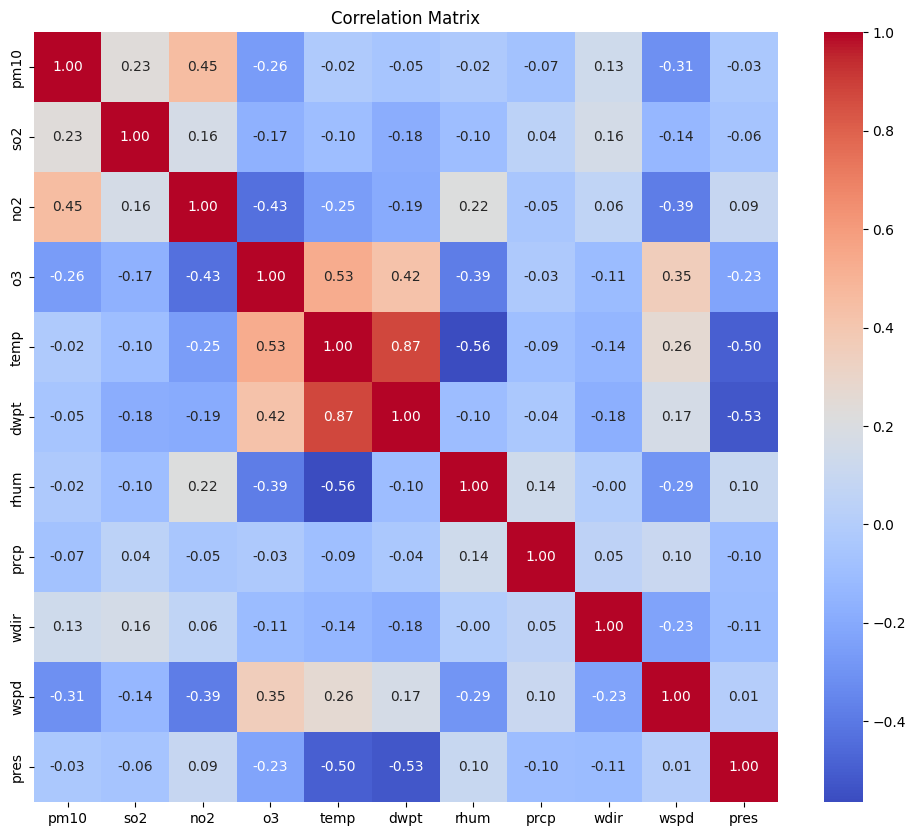

In [31]:
# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# **Veri Ön İşleme**

In [ ]:
# Sütun isimlerindeki baştaki/sondaki boşlukları kaldır
df.columns = df.columns.str.strip()

In [32]:
# Eksik değerleri ve yüzdelerini yazdır
print(pd.DataFrame({'Eksik veri Sayısı': eksik, 'Oran (%)': oran})[eksik > 0])

      Eksik veri Sayısı   Oran (%)
pm10               2698   7.694501
so2                1124   3.205567
no2                1119   3.191307
o3                12180  34.736482
prcp                286   0.815651
wdir                 29   0.082706
pres                162   0.462012


In [33]:
# datetime sütunu varsa, onu indeks olarak ayarla
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('datetime', inplace=True)



In [34]:
# Sadece sayısal sütunları seç
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Zaman indeksli interpolasyon
df[numeric_cols] = df[numeric_cols].interpolate(method='time')

# Kalan eksik değerleri ileri ve geri doldurma ile tamamla
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)


<ipython-input-34-6d62fd3db610>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-34-6d62fd3db610>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [ ]:
# Eksik değerleri tespit et (imputation sonrası)
eksik_son = df.isnull().sum()
oran_son = 100 * df.isnull().mean()

# Kontrol: Hâlâ eksik değer var mı? (düzenlenmiş)
print(pd.DataFrame({'Eksik Sayı': eksik_son, 'Oran (%)': oran_son})[eksik_son > 0] if eksik_son.any() else "Kontrol edildi. Eksik veri yoktur.")

Kontrol edildi. Eksik veri yoktur.


In [ ]:
#df = df.drop(columns=['nox', 'no'])

In [ ]:
#df.to_csv('/content/drive/MyDrive/BanAQI.csv', index=False)

In [35]:
print(df.describe(exclude=['datetime64[ns]', 'int64']).T)  # Datetime satırlarını çıkardım.

        count         mean         std     min      25%       50%          75%      max
pm10  35064.0    43.809780   24.989902    0.31    26.93    38.400    54.640000   320.89
so2   35064.0     8.314033    7.453856    0.00     3.85     6.280    10.541786   209.86
no2   35064.0    31.783555   20.315105    0.38    17.09    27.370    41.680000   178.03
o3    35064.0    38.900198   33.495711    1.28     7.80    32.145    65.340000   192.34
temp  35064.0    15.521986    8.121103   -8.30     9.20    15.000    22.000000    43.00
dwpt  35064.0    10.790038    6.541019   -9.50     6.20    11.000    16.000000    27.00
rhum  35064.0    75.925650   16.789278   13.00    64.00    78.000    89.000000   100.00
prcp  35064.0     0.073098    0.382213    0.00     0.00     0.000     0.000000    11.70
wdir  35064.0   118.654090  115.650153    0.00    30.00    52.000   200.000000   360.00
wspd  35064.0    16.274809   11.481866    0.00     5.40    14.800    24.100000    74.20
pres  35064.0  1015.903822    6.

Aykırı Değer Analizi

In [36]:
def aykiri_istatistik(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    alt = Q1 - 1.5 * IQR
    ust = Q3 + 1.5 * IQR
    aykiri_mask = (df[col] < alt) | (df[col] > ust)
    aykiri_sayi = aykiri_mask.sum()
    toplam = df[col].count()
    oran = 100 * aykiri_sayi / toplam
    return aykiri_sayi, oran

kolonlar = df.select_dtypes(include=['float64', 'int64']).columns
sonuc = []

for col in kolonlar:
    sayi, oran = aykiri_istatistik(df, col)
    if sayi > 0:
        sonuc.append({'Değişken': col, 'Aykırı Sayı': sayi, 'Oran (%)': round(oran, 2)})

# DataFrame olarak yazdır
aykiri_df = pd.DataFrame(sonuc).sort_values(by='Oran (%)', ascending=False)
print(aykiri_df.to_string(index=False))

Değişken  Aykırı Sayı  Oran (%)
    prcp         3967     11.31
     so2         1865      5.32
    pm10         1381      3.94
     no2         1126      3.21
    pres          428      1.22
    wspd           82      0.23
    rhum           72      0.21
      o3           58      0.17
    dwpt            6      0.02
    temp            3      0.01


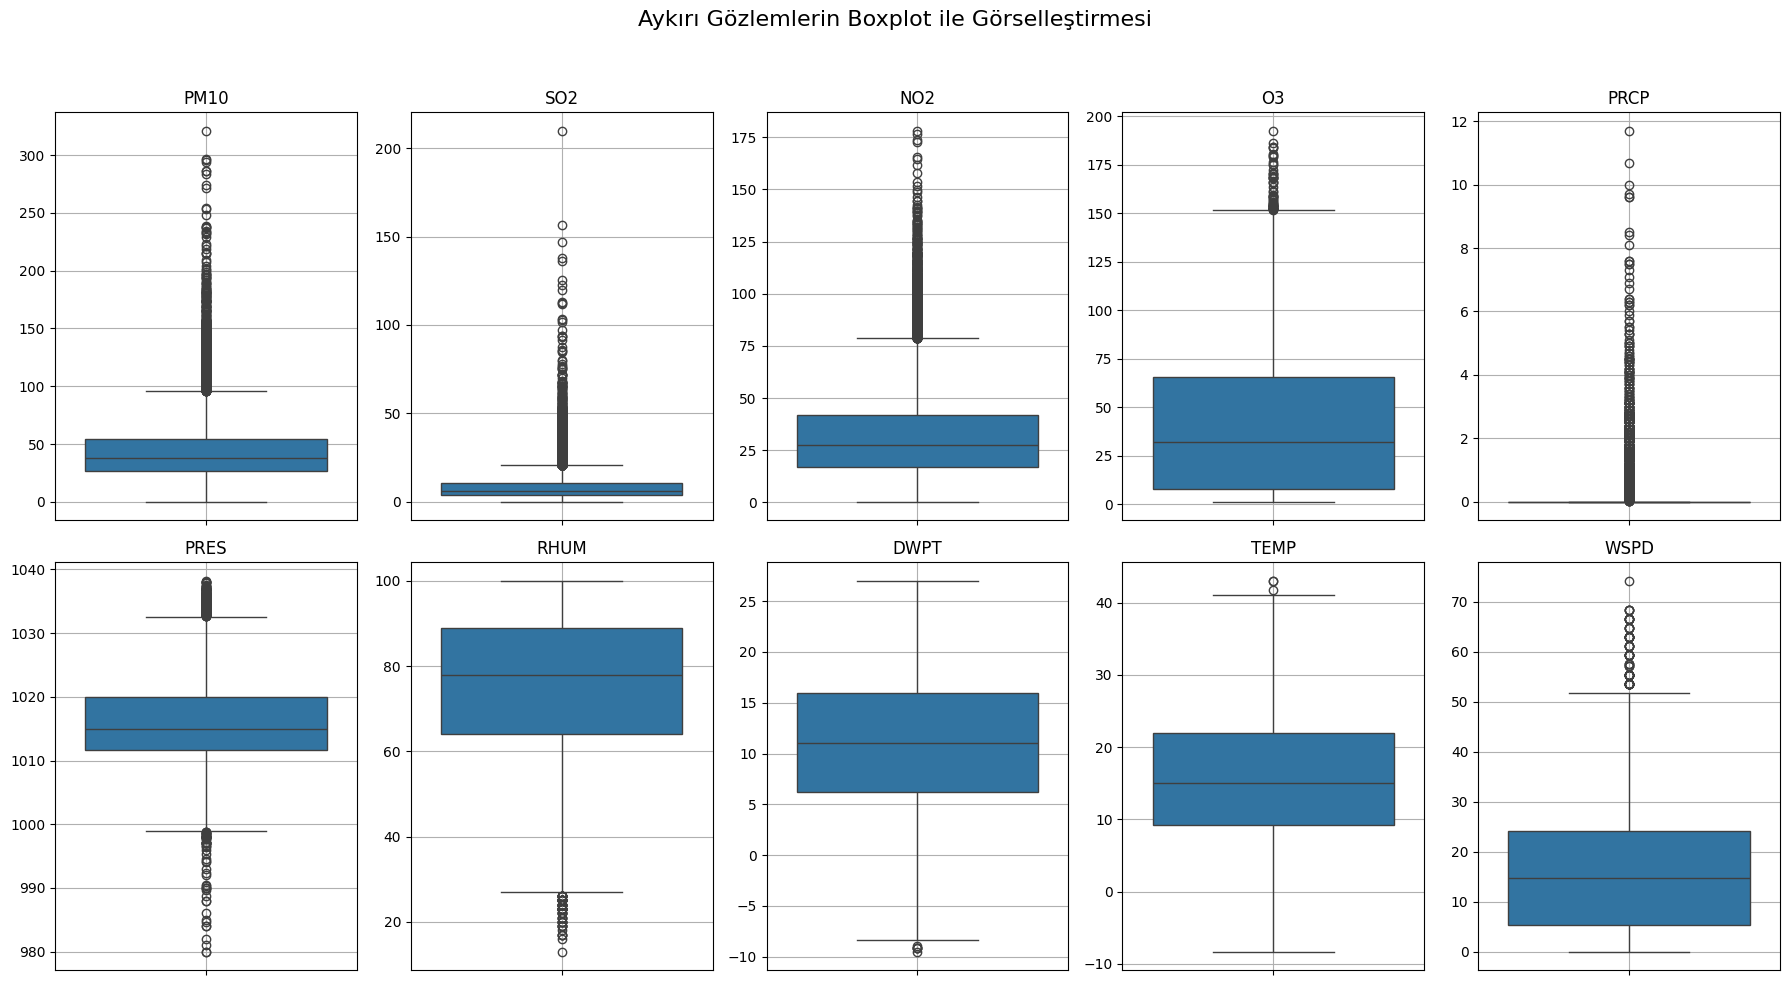

In [41]:
out_cols = ['pm10', 'so2', 'no2', 'o3',"prcp","pres","rhum","dwpt","temp","wspd"]
fig, axes = plt.subplots(2, 5, figsize=(18, 10))  # 2 satır, 5 sütun
fig.suptitle("Aykırı Gözlemlerin Boxplot ile Görselleştirmesi", fontsize=16)

for ax, col in zip(axes.flatten(), out_cols):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f'{col.upper()}')
    ax.set_ylabel("")
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Başlıkla çakışmayı engeller
plt.show()

In [ ]:
#df.to_csv('/content/drive/MyDrive/hava_kalitesi/temizlenmiş_veri.csv', index=False)

In [42]:
def aykiri_flagla(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    alt = Q1 - 1.5 * IQR
    ust = Q3 + 1.5 * IQR
    df[f'{col}_aykiri'] = ((df[col] < alt) | (df[col] > ust)).astype(int)
    return df

for col in out_cols:
    df = aykiri_flagla(df, col)

In [43]:
if 'month' not in df.columns:
    df['month'] = df.index.month  # datetime index varsa

AYKIRI GÖZLEM GÜNLERİNİN AYLARA GÖRE DAĞILIMI

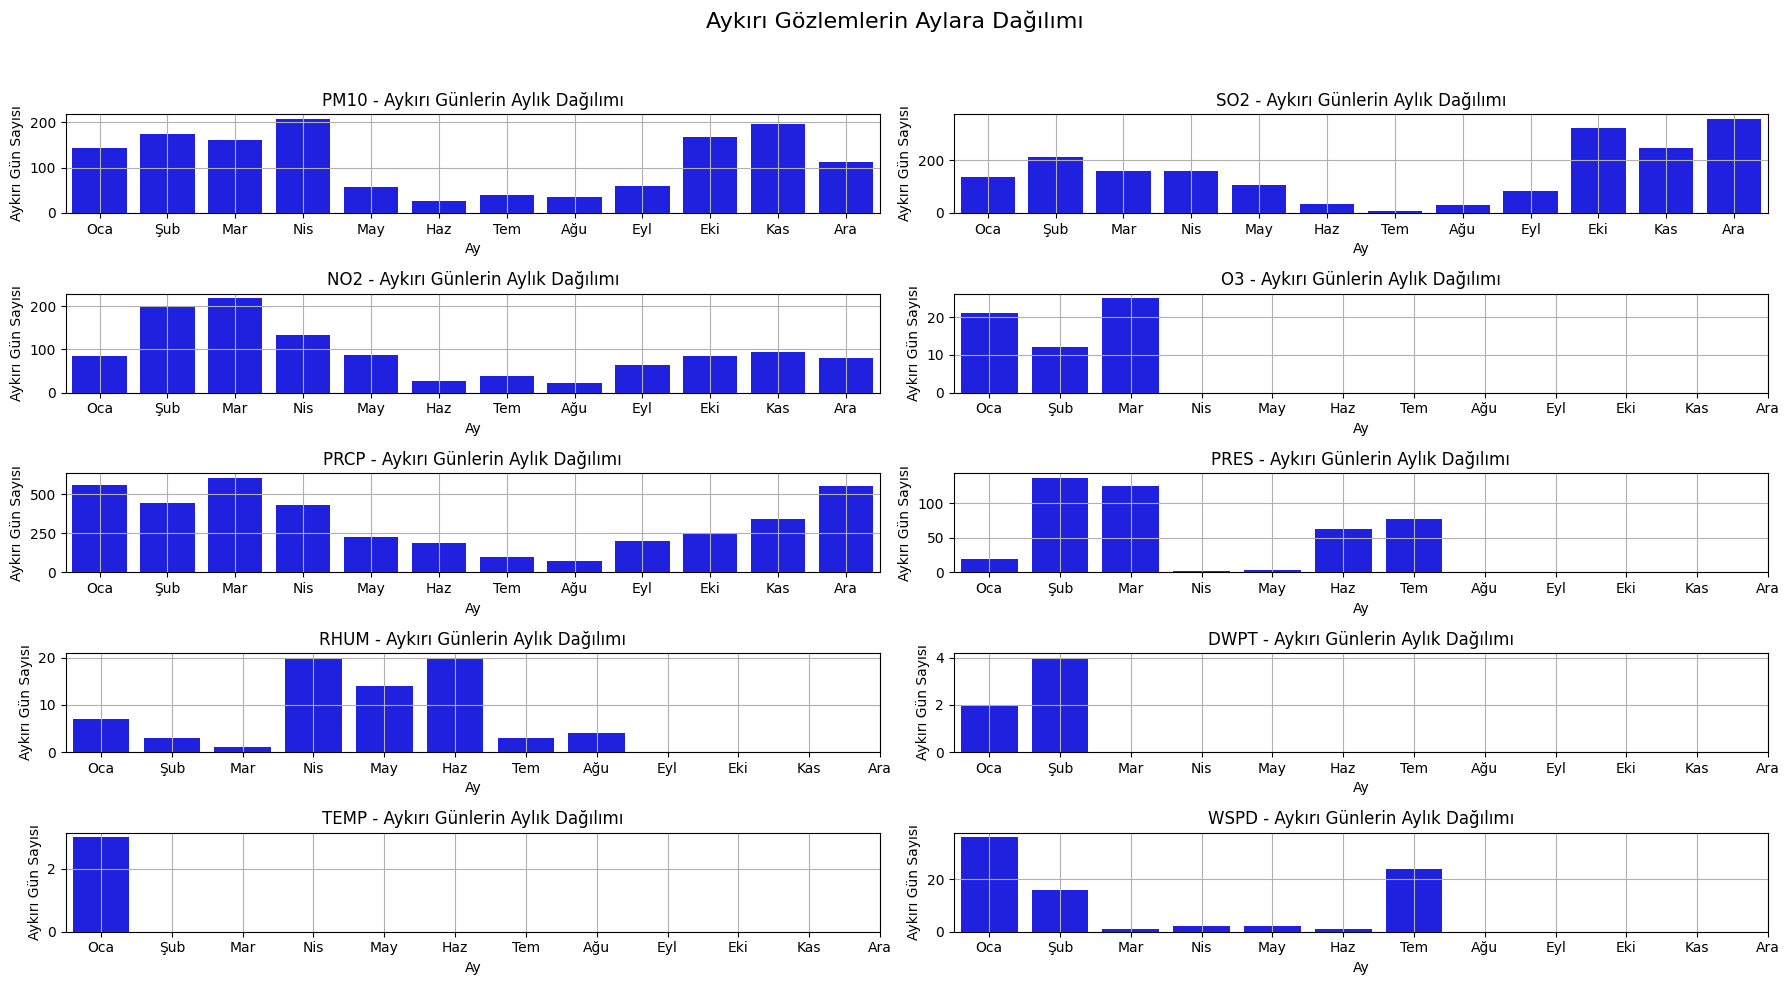

In [54]:
plt.figure(figsize=(18, 10))
for i, col in enumerate(out_cols):
    plt.subplot(5, 2, i + 1)
    aykiri_ay = df[df[f'{col}_aykiri'] == 1]['month'].value_counts().sort_index()
    sns.barplot(x=aykiri_ay.index, y=aykiri_ay.values, color="blue")  # Update here
    plt.title(f"{col.upper()} - Aykırı Günlerin Aylık Dağılımı")
    plt.xlabel("Ay")
    plt.ylabel("Aykırı Gün Sayısı")
    plt.xticks(range(0, 12), labels=[
        'Oca', 'Şub', 'Mar', 'Nis', 'May', 'Haz', 'Tem', 'Ağu', 'Eyl', 'Eki', 'Kas', 'Ara'
    ])
    plt.grid(True)

plt.suptitle("Aykırı Gözlemlerin Aylara Dağılımı", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
import pandas as pd
from scipy.stats.mstats import winsorize

for col in ['so2', 'pres', 'prcp']:
    win_data = winsorize(df[col], limits=[0.01, 0.01])
    df[col + '_win'] = pd.Series(win_data, index=df.index)



In [ ]:
pol_cols_wins= ['pm10', 'so2_win', 'no2', 'nox', 'no', 'o3']

In [ ]:
print(df[pol_cols_wins]
      .describe().T)
print(df[pol_cols_win]
      .describe().T)

           count       mean        std   min      25%     50%        75%     max
pm10     35064.0  43.809780  24.989902  0.31  26.9300  38.400  54.640000  320.89
so2_win  35064.0   8.160201   6.354734  0.90   3.8500   6.280  10.541786   34.95
no2      35064.0  31.783555  20.315105  0.38  17.0900  27.370  41.680000  178.03
nox      35064.0  53.007048  43.660951  1.69  25.5075  41.700  65.860000  704.68
no       35064.0  13.137109  18.114061  0.03   4.0500   7.940  15.010000  344.32
o3       35064.0  38.900198  33.495711  1.28   7.8000  32.145  65.340000  192.34
        count       mean        std   min      25%     50%        75%     max
pm10  35064.0  43.809780  24.989902  0.31  26.9300  38.400  54.640000  320.89
so2   35064.0   8.314033   7.453856  0.00   3.8500   6.280  10.541786  209.86
no2   35064.0  31.783555  20.315105  0.38  17.0900  27.370  41.680000  178.03
nox   35064.0  53.007048  43.660951  1.69  25.5075  41.700  65.860000  704.68
no    35064.0  13.137109  18.114061  0.03  

| Kriter                                   | Değişkenler                                      |
| ---------------------------------------- | ------------------------------------------------ |
| **Olduğu gibi korunmalı**                | `pm10`, `no`, `nox`, `no2`, `o3`, `wspd`, `rhum` |
| **Eşikle sınırlandırılmalı (winsorize)** | `so2`, `pres`, `prcp`                            |
| **İhmal edilebilir düzeyde (ignore)**    | `temp`, `dwpt`                                   |


In [ ]:
df.columns

Index(['year', 'month', 'day', 'hour', 'pm10', 'so2', 'no2', 'nox', 'no', 'o3',
       'temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres', 'pm10_aykiri',
       'so2_aykiri', 'no2_aykiri', 'nox_aykiri', 'no_aykiri', 'o3_aykiri',
       'prcp_aykiri', 'pres_aykiri', 'rhum_aykiri', 'dwpt_aykiri',
       'temp_aykiri', 'wspd_aykiri', 'day_of_week', 'hour_of_day', 'so2_win',
       'pres_win', 'prcp_win'],
      dtype='object')